#Self Organizing Map

##Install MiniSom Package

In [13]:
!pip install MiniSom

### Importing the libraries


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [15]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
#All columns except last column
X = dataset.iloc[:, :-1].values
#Last column- if they were accepted (used to make distinction- see which frauds were accepted)
y = dataset.iloc[:, -1].values

## Feature Scaling


In [16]:
#Normalizes values to 0-1 scale
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [17]:
#Not in SKLearn
#Need to pip install or import minisom.py file
from minisom import MiniSom
#x and y are dimensions of grid (map), bigger- more accurate
#input len- number of features in x (15 variables)
#sigma- radius of diff neighborhoods in grid (default 1)
#learning rate- how much weights are updated (default 0.5)
#no decay function, but can be used to improve convergence
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
#randomly initialize weights (step 3)
som.random_weights_init(X)

#train SOM on X, 100 iterations
#Works very fast
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


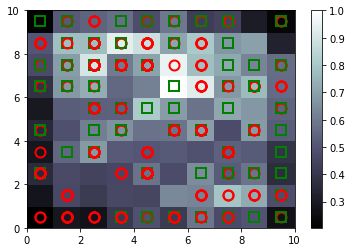

In [18]:
#2d grid of all final winning nodes
#calculate mean interneuron distance
#winning node with higher MID- farther from neighbors (more outliers)


#larger MID- closer to white
from pylab import bone, pcolor, colorbar, plot, show
#initializes figure (window that will contain map)
bone()
#put winning nodes on map- add MID for winning nodes (use colors based on range)
#distance map gets distance (returns in one matrix- transposes to make it in right order)
pcolor(som.distance_map().T)
#adds legend
colorbar()
#red circles- not approved
#green squares- approved
markers = ['o', 's']
colors = ['r', 'g']
#i is index, x is diff vector of customers
for i, x in enumerate(X):
  #get winning node of customer x
    w = som.winner(x)
    #place colored marker
    #color with red circle/green square dep on if customer was approved (y[i])
    #place in center of winning node (w[0],w[1]) is lower left corner
    #only color edge as can be two markers for same node
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
#show graph
show()

## Finding the frauds


In [20]:
#Frauds are outliers
#Calculate mean interneuron distance within the neighborhood to detect outliers

#find mappings of winning nodes to customers
mappings = som.win_map(X)
#get coordinates of outliers
#vertically concat
frauds = np.concatenate((mappings[(5,6)],mappings[(5,7)]), axis = 0)
#inverses normalization to get regular customer ids
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [21]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15799785
15610042
